In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [22]:
# load numpy zip
data = np.load('./output_crop/data_10000_norm.npz')

In [23]:
X  = data['arr_0'] # independent features
y = data['arr_1'] # target value

In [24]:
X.shape, y.shape

((5458, 10000), (5458,))

# Eigen Image

In [25]:
X1 = X - X.mean(axis=0)

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')

In [28]:
x_pca = pca.fit_transform(X1)

In [29]:
x_pca.shape

(5458, 5458)

In [30]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

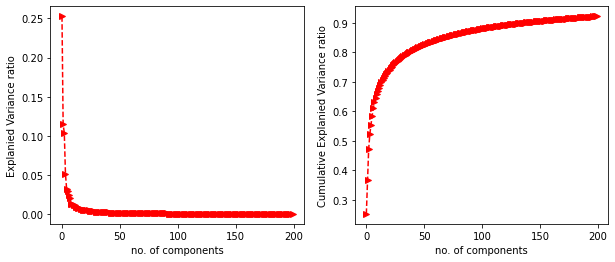

In [31]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no. of components')
plt.ylabel('Explanied Variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no. of components')
plt.ylabel('Cumulative Explanied Variance ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')
plt.show()

conclusion: using elbow method, consider number of compoenent is between 25 - 30
> since if I consider component between 25 to 30 the explained variance is around 75 % 
so, in order to get min 80% variance I am considering 50 compoenents

In [32]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)

In [33]:
x_pca_50.shape

(5458, 50)

In [34]:
# saving pca
import pickle

In [35]:
pickle.dump(pca_50,open('./output_crop/pca_50.pickle','wb'))

In [36]:
# consider 50 compnent and inverse transform
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [37]:
x_pca_inv.shape

(5458, 10000)

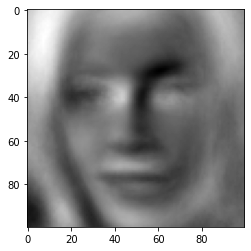

In [38]:
# consider one image (one row)
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img,cmap='gray')

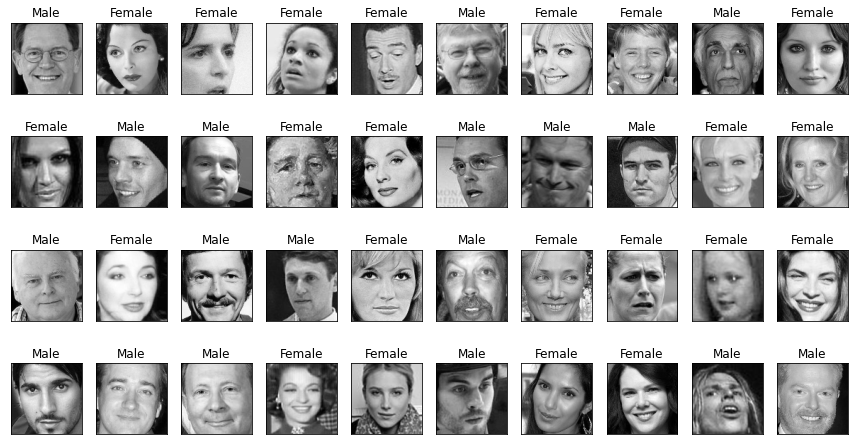

====================Eigen Images====================


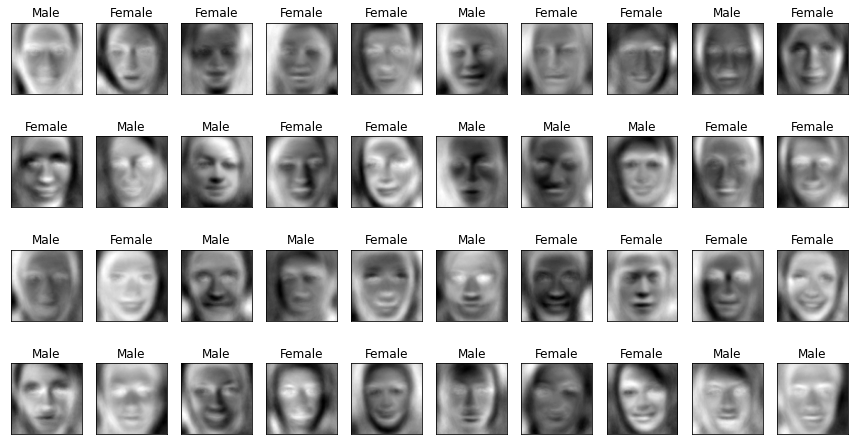

In [39]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
    
np.random.randint(1001)
pics = np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [42]:
# saving 
np.savez('./data/data_pca_50_y_mean.pickle',x_pca_50,y,X.mean(axis=0))
print("uu")

uu


In [43]:
# saving 
np.savez('data_pca_50_y_mean.pickle',x_pca_50,y,X.mean(axis=0))
print("uu")

uu


In [41]:
# saving 
np.savez('./data/data_pca_50_y_mean.pickle.npz',x_pca_50,y,X.mean(axis=0))

In [44]:
# saving 
np.savez('data2_pca_50_y_mean.pickle',x_pca_50,y,X.mean(axis=0))
print("uu")

uu


In [ ]:
pickle.dump(pca_50,open('./output_crop/pca_50.pickle','wb'))

In [45]:
# saving 
np.savez('data_pca_50_y_mean.pickle',x_pca_50,y,X.mean(axis=0))